<a href="https://colab.research.google.com/github/dmscornjs/Hotelreview/blob/main/%EB%A6%AC%EB%B7%B0%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
!pip install git+https://github.com/ssut/py-hanspell.git
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git
!pip install konlpy
!pip install wordcloud
!pip install gensim
```


*   클러스터링




코랩 런타임 끊기지 않고 하는 법



```
function ClickConnect(){ console.log("Working"); document.querySelector("colab-toolbar-button").click() }setInterval(ClickConnect, 1800000)

```





# 리뷰 분류

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install konlpy
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.4 MB/s 
     |████████████████████████████████| 453 kB 58.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import sys
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split


In [ ]:
df= pd.read_csv("/content/drive/MyDrive/최종합친호텔리뷰.csv")
sent= pd.read_csv("/content/drive/MyDrive/호텔감성분석확률.csv")
top = pd.read_csv("/content/drive/MyDrive/야놀자명사100.csv",encoding='utf-8',delimiter="\t",header = None )
ttt = pd.read_csv("위치.txt",header = None)

FileNotFoundError: ignored

In [ ]:
in_file = open("stations.txt",'rt', encoding='UTF8')
stations = []
for line in in_file:
    data = line.strip().split(" - ")
    stations+=data

In [ ]:
df_sent = sent.loc[:,['sentiment','sent_proba']] 

In [ ]:
top = top[:100]
top.columns=["n", "c", "t"]

In [ ]:
top.t.value_counts()

0    36
1    30
2    13
5    11
3     7
4     3
Name: t, dtype: int64

In [ ]:
n1 = list(top.n.loc[top.t==1])
n2 = list(top.n.loc[top.t==2])
n3 = list(top.n.loc[top.t==3])
n4 = list(top.n.loc[top.t==4])

In [ ]:
lt = ttt[0].values.tolist()

In [ ]:
n3+=lt
n3+=stations

In [ ]:
n3 = list(set(n3))

In [ ]:
n3

[' 녹번',
 ' 수리산',
 '의정부중앙',
 ' 신정네거리',
 ' 신촌',
 ' 상갈',
 '석남',
 '온양온천',
 ' 금호',
 ' 캠퍼스타운',
 '화계',
 ' 양수',
 '구산',
 ' 우장산',
 '테크노파크',
 '검단사거리',
 ' 석촌',
 ' 산성',
 '동묘앞',
 ' 홍제',
 '인천시청',
 ' 을지로입구',
 '두정',
 '시장',
 '여의도',
 '남대문',
 '가까워',
 ' 구로디지털단지',
 ' 인천대입구',
 ' 신원',
 '화곡',
 '솔밭공원',
 '이동',
 ' 녹양',
 '구로',
 ' 학여울',
 ' 상봉',
 '중앙보훈병원',
 '연수',
 '동대문',
 '온수',
 ' 범계',
 ' 관악',
 ' 왕십리',
 '효창공원앞',
 '상도',
 '광화문',
 ' 용산',
 '이태원',
 ' 삼각지',
 ' 죽전',
 ' 아신',
 '동백',
 ' 송정',
 '광운대',
 '불광',
 '신대방삼거리',
 '마두',
 ' 금촌',
 '신창',
 ' 마포',
 '남영',
 '올림픽공원',
 ' 금곡',
 ' 정왕',
 ' 보문',
 '인천공항2터미널',
 '화전',
 '당산',
 ' 잠실',
 ' 일원',
 '교통',
 ' 방학',
 '가깝',
 '부천시청',
 '지행',
 '청구',
 '백양리',
 ' 서초',
 ' 창동',
 ' 중랑',
 '광나루',
 '김포공항',
 '동두천',
 ' 오류동',
 ' 계양',
 '둔촌오륜',
 '부천종합운동장',
 ' 경찰병원',
 ' 부평구청',
 ' 청명',
 '위치',
 '용문',
 ' 반포',
 ' 구성',
 ' 역삼',
 '한대앞',
 ' 대치',
 ' 양재시민의숲',
 '보평',
 '신촌',
 '영등포시장',
 '운연',
 ' 가양',
 '거리',
 ' 세류',
 ' 석계',
 '양평',
 ' 매봉',
 ' 단대오거리',
 ' 대성리',
 ' 중화',
 '석촌고분',
 '검단오류',
 ' 문산',
 ' 신금호',
 ' 삼산체육관',
 ' 중동',
 '종로3가',
 '

In [ ]:
df['시설']=0
df['서비스']=0
df['위치']=0
df['가격']=0

In [ ]:
df

,hotel,star,review,date,real_date,length,review_spell_check,site,시설,서비스,위치,가격
0,AC 호텔 바이 메리어트 서울 강남,4,발렛파킹 비용이 있긴 했지만 방도 나름 괜찮고 조식도 맛있었어요,10시간 전,2022. 04. 03,35,발레파킹 비용이 있긴 했지만 방도 나름 괜찮고 조식도 맛있었어요,0,0,0,0,0
1,AC 호텔 바이 메리어트 서울 강남,5,굳굳굳굳굳,6일 전,2022. 04. 01,5,굳굳굳굳굳,0,0,0,0,0
2,AC 호텔 바이 메리어트 서울 강남,3,생각보다 방이 좁아서 놀랐어요 아무래도 안마의자나 고급 블루투스 스피커처럼 주변기기...,6일 전,2022. 04. 01,84,생각보다 방이 좁아서 놀랐어요 아무래도 안마의자나 고급 블루투스 스피커처럼 주변기기...,0,0,0,0,0
3,AC 호텔 바이 메리어트 서울 강남,5,오픈하고 얼마안되서 갔었는데 깔끔하고 좋은 호텔이였습니다 오픈초기에 사소한 부분에서...,2022. 03. 27,2022. 03. 27,99,오픈하고 얼마 안 돼서 갔었는데 깔끔하고 좋은 호텔이었습니다 오픈 초기에 사소한 부...,0,0,0,0,0
4,몬드리안 서울 이태원(Mondrian Seoul Itaewon),5,객실이 깨끗하고 너무 예뻣어요,3일 전,2022. 04. 01,16,객실이 깨끗하고 너무 예뻤어요,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
237445,뜨랑블루 호텔,2,시설 깨끗하고 다 좋은데퇴실도 안햇는데 청소하시는분인지 입구문을 맘대로 여시더라구요...,5년 전,5년 전,60,시설 깨끗하고 다 좋은데 퇴실도 안 했는데 청소하시는 분인지 입구물을 맘대로 여시더...,1,0,0,0,0
237446,뜨랑블루 호텔,5,깔끔하고 친철하고 모두 만족해요꼭 한번더 오고 싶은 숙박업소입니다,5년 전,5년 전,36,깔끔하고 친절하고 모두 만족해요 꼭 한 번 더 오고 싶은 숙박업소입니다,1,0,0,0,0
237447,뜨랑블루 호텔,5,괜찮았어요 좋더라구요 마음에 들었어요냄새도 안나드러구요,5년 전,5년 전,30,괜찮았어요 좋더라고요 마음에 들었어요 냄새도 안나드러구요,1,0,0,0,0
237448,뜨랑블루 호텔,5,시설 신림권에서 최고청결하고 수건에서 냄새도 안나고흠이라면 1000원받는 일회용품이...,5년 전,5년 전,51,시설 신림권에서 최고 청결하고 수건에서 냄새도 안 나고 흠이라면 1000원 받는 일...,1,0,0,0,0


In [ ]:
for x in n1:
  df['시설'][df.review_spell_check.str.contains(x)]+=df.review_spell_check.str.count(x)
for x in n2:
  df['서비스'][df.review_spell_check.str.contains(x)]+=df.review_spell_check.str.count(x)
for x in n3:
  df['위치'][df.review_spell_check.str.contains(x)]+=df.review_spell_check.str.count(x)
for x in n4:
  df['가격'][df.review_spell_check.str.contains(x)]+=df.review_spell_check.str.count(x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying

In [ ]:
df_new = df.loc[:,['시설', '서비스', '위치', '가격']].max(axis=1)

In [ ]:
df['label'] = 0

In [ ]:
df.label.loc[df['시설']==df_new]=1
df.label.loc[df['서비스']==df_new]=2
df.label.loc[df['위치']==df_new]=3
df.label.loc[df['가격']==df_new]=4

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df.label.loc[df_new==0]=0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
#토픽 위치 추가 후
df.label.value_counts()

0    77677
1    77466
2    47305
3    25372
4     9630
Name: label, dtype: int64

In [ ]:
#역명 정보 추가 후
df.label.value_counts()

0    76984
1    74596
2    45809
3    31146
4     8915
Name: label, dtype: int64

In [ ]:
df.describe()

,star,length,site,시설,서비스,위치,가격,label
count,237450.000000,237450.000000,237450.000000,237450.000000,237450.000000,237450.000000,237450.000000,237450.000000
mean,4.635641,57.506161,0.483799,1.554218,0.856500,0.686966,0.131998,1.243681
std,0.744728,76.847789,0.499739,2.443693,1.522661,1.561282,0.470919,1.149058
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,23.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,5.000000,66.000000,1.000000,2.000000,1.000000,1.000000,0.000000,2.000000
max,5.000000,500.000000,1.000000,60.000000,25.000000,41.000000,36.000000,4.000000


# 분류 지도학습

In [ ]:
# train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.review_spell_check, df.label, test_size=0.3, shuffle=True, stratify=df.label, random_state=777)

In [ ]:
y_train.value_counts()

0    53889
1    52217
2    32066
3    21802
4     6241
Name: label, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer #sklearn 패키지의 CountVectorizer import
vectorizer = CountVectorizer() #countvectorizer 생성
vectorizer.fit(x_train) # countvectorizer 학습
X = vectorizer.transform(x_train) # transform

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
#입력해서 확인하는 용도
#run model
X_pred = vectorizer.transform([input()]) 
y_pred = model.predict(X_pred)
print(y_pred)

가격 대비 괜찮네요
[4]


In [ ]:
model.score(X, y_train)

0.9778299190807087

In [ ]:
#run model
X_pred = vectorizer.transform(x_test) 
y_pred = model.predict(X_pred)

In [ ]:
model.score(X_pred, y_test)

0.9209517793219625

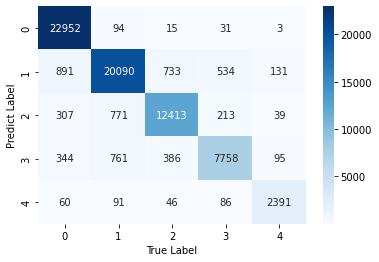

In [ ]:
# confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Blues')
plt.xlabel('True Label')
plt.ylabel('Predict Label')
plt.show()

In [ ]:
df_train = df.review_spell_check

In [ ]:
#run model
df_vec= vectorizer.transform(df_train) 
l_pred = model.predict(df_vec)
proba = model.predict_proba(df_vec)

In [ ]:
df_proba= pd.DataFrame(proba)

In [ ]:
df_proba

,0,1,2,3,4
0,3.874113e-05,0.922787,0.068350,8.489839e-03,3.334874e-04
1,9.811697e-01,0.006099,0.005713,4.876576e-03,2.141469e-03
2,1.694947e-06,0.999445,0.000018,5.338017e-04,8.318019e-07
3,9.436890e-09,0.999912,0.000014,7.195487e-05,1.896939e-06
4,2.520743e-02,0.882314,0.032072,4.726061e-02,1.314650e-02
...,...,...,...,...,...
237445,7.543127e-07,0.999801,0.000024,1.561764e-04,1.834974e-05
237446,1.853394e-03,0.013259,0.936564,4.551936e-02,2.803765e-03
237447,2.309130e-01,0.759288,0.002379,6.161991e-03,1.258047e-03
237448,2.890378e-10,0.999997,0.000002,5.563171e-07,1.298812e-07


In [ ]:
label_prob = df_proba.max(axis=1)

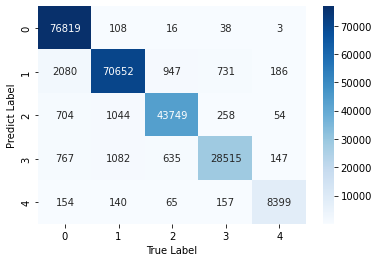

In [ ]:
# confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
cm = confusion_matrix(df.label,l_pred)
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Blues')
plt.xlabel('True Label')
plt.ylabel('Predict Label')
plt.show()

In [ ]:
model.score(df_vec, df.label)

0.9607664771530848

In [ ]:
df['label_pred'] = l_pred

In [ ]:
df['label_proba'] = label_prob

In [ ]:
df['sentiment']= sent['sentiment']
df['sent_proba'] = sent['sent_proba']

In [ ]:
df.describe()

,star,length,site,시설,서비스,위치,가격,label,label_pred,label_proba,sentiment,sent_proba
count,237450.000000,237450.000000,237450.000000,237450.000000,237450.000000,237450.000000,237450.000000,237450.000000,237450.000000,237450.000000,237450.000000,2.374500e+05
mean,4.635641,57.506161,0.483799,1.554218,0.856500,0.686966,0.131998,1.243681,1.213321,0.926556,0.785172,7.022491e-01
std,0.744728,76.847789,0.499739,2.443693,1.522661,1.561282,0.470919,1.149058,1.148170,0.102708,0.410704,3.023777e-01
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.280929,0.000000,1.531017e-18
25%,4.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.916623,1.000000,5.535977e-01
50%,5.000000,23.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.961131,1.000000,8.077600e-01
75%,5.000000,66.000000,1.000000,2.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.993543,1.000000,9.426238e-01
max,5.000000,500.000000,1.000000,60.000000,25.000000,41.000000,36.000000,4.000000,4.000000,1.000000,1.000000,1.000000e+00


In [ ]:
df.to_csv("호텔리뷰모델포함.csv", index=False)

# 서비스 형태

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/호텔리뷰모델포함.csv")

In [ ]:
df.hotel.loc[df.hotel=='ENA 스위트호텔 남대문']='ENA 스위트 호텔 남대문'
df.hotel.loc[df.hotel=='SR호텔 서울 마곡']='SR 호텔 서울 마곡'
df.hotel.loc[df.hotel=='노보텔 앰배서더 동대문 호텔&레지던스']='노보텔 앰배서더 동대문 호텔 & 레지던스'
df.hotel.loc[df.hotel=='라이즈 오토그래프 컬렉션 바이메리어트']= '라이즈 오토그래프 컬렉션 바이 메리어트'
df.hotel.loc[df.hotel=='롯데호텔 서울 이그제큐티브타워'] = '롯데 호텔 서울'
df.hotel.loc[df.hotel=='소피텔 앰배서더 서울 호텔 & 서비스드 레지던스']='소피텔 앰배서더 서울'
df.hotel.loc[df.hotel=='솔라리아 니시테츠 호텔 명동']= '솔라리아 니시테츠 명동'
df.hotel.loc[df.hotel=='몬드리안 서울 이태원(Mondrian Seoul Itaewon)'] = '몬드리안 서울 이태원'
df.hotel.loc[df.hotel=='이비스 앰배서더 서울 명동'] = '이비스 앰배서더 명동'
df.hotel.loc[df.hotel=='스타즈호텔 독산'] = '스타즈 호텔 독산'
df.hotel.loc[df.hotel=='호텔 리베라 청담'] = '호텔 리베라'
df.hotel.loc[df.hotel=='홍대 나인브릭호텔']='홍대 나인브릭 호텔'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df

,hotel,star,review,date,real_date,length,review_spell_check,site,시설,서비스,위치,가격,label,label_pred,label_proba,sentiment,sent_proba
0,AC 호텔 바이 메리어트 서울 강남,4,발렛파킹 비용이 있긴 했지만 방도 나름 괜찮고 조식도 맛있었어요,10시간 전,2022. 04. 03,35,발레파킹 비용이 있긴 했지만 방도 나름 괜찮고 조식도 맛있었어요,0,2,1,0,0,1,1,0.922787,0,0.157060
1,AC 호텔 바이 메리어트 서울 강남,5,굳굳굳굳굳,6일 전,2022. 04. 01,5,굳굳굳굳굳,0,0,0,0,0,0,0,0.981170,1,0.690170
2,AC 호텔 바이 메리어트 서울 강남,3,생각보다 방이 좁아서 놀랐어요 아무래도 안마의자나 고급 블루투스 스피커처럼 주변기기...,6일 전,2022. 04. 01,84,생각보다 방이 좁아서 놀랐어요 아무래도 안마의자나 고급 블루투스 스피커처럼 주변기기...,0,4,0,2,0,1,1,0.999445,0,0.168279
3,AC 호텔 바이 메리어트 서울 강남,5,오픈하고 얼마안되서 갔었는데 깔끔하고 좋은 호텔이였습니다 오픈초기에 사소한 부분에서...,2022. 03. 27,2022. 03. 27,99,오픈하고 얼마 안 돼서 갔었는데 깔끔하고 좋은 호텔이었습니다 오픈 초기에 사소한 부...,0,2,1,0,0,1,1,0.999912,1,0.880336
4,몬드리안 서울 이태원,5,객실이 깨끗하고 너무 예뻣어요,3일 전,2022. 04. 01,16,객실이 깨끗하고 너무 예뻤어요,0,1,0,0,0,1,1,0.882314,1,0.807030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237445,뜨랑블루 호텔,2,시설 깨끗하고 다 좋은데퇴실도 안햇는데 청소하시는분인지 입구문을 맘대로 여시더라구요...,5년 전,5년 전,60,시설 깨끗하고 다 좋은데 퇴실도 안 했는데 청소하시는 분인지 입구물을 맘대로 여시더...,1,3,0,0,0,1,1,0.999801,0,0.090315
237446,뜨랑블루 호텔,5,깔끔하고 친철하고 모두 만족해요꼭 한번더 오고 싶은 숙박업소입니다,5년 전,5년 전,36,깔끔하고 친절하고 모두 만족해요 꼭 한 번 더 오고 싶은 숙박업소입니다,1,0,1,0,0,2,2,0.936564,1,0.996796
237447,뜨랑블루 호텔,5,괜찮았어요 좋더라구요 마음에 들었어요냄새도 안나드러구요,5년 전,5년 전,30,괜찮았어요 좋더라고요 마음에 들었어요 냄새도 안나드러구요,1,2,0,0,0,1,1,0.759288,1,0.726964
237448,뜨랑블루 호텔,5,시설 신림권에서 최고청결하고 수건에서 냄새도 안나고흠이라면 1000원받는 일회용품이...,5년 전,5년 전,51,시설 신림권에서 최고 청결하고 수건에서 냄새도 안 나고 흠이라면 1000원 받는 일...,1,4,0,1,0,1,1,0.999997,1,0.615526


In [ ]:
df.groupby(['hotel']).mean().sort_values(['sentiment'])

,star,length,site,시설,서비스,위치,가격,label,label_pred,label_proba,sentiment,sent_proba
hotel,,,,,,,,,,,,
메이원호텔,4.000000,78.750000,1.0,3.000000,0.250000,2.500000,0.500000,1.000000,1.000000,0.973024,0.250000,0.369443
서울시티호텔,3.576923,67.307692,1.0,1.807692,0.807692,1.346154,0.500000,2.269231,2.000000,0.933135,0.269231,0.305602
명동 이코노미 호텔 프리미어,3.629630,78.333333,1.0,2.481481,0.814815,0.814815,0.407407,1.518519,1.629630,0.946582,0.333333,0.371095
명동 뉴 스테이 인,4.102564,36.435897,0.0,1.051282,0.102564,0.641026,0.230769,1.000000,0.948718,0.915728,0.333333,0.380198
명동 MUST STAY HOTEL,3.304348,87.217391,1.0,2.217391,0.956522,0.739130,0.304348,1.826087,1.869565,0.908069,0.347826,0.395280
...,...,...,...,...,...,...,...,...,...,...,...,...
조선 팰리스 서울 강남 럭셔리 컬렉션,4.888889,161.655556,1.0,3.488889,2.777778,0.633333,0.233333,1.311111,1.322222,0.967908,0.922222,0.886289
로이넷호텔 서울 마포,4.866667,40.600000,0.0,1.533333,0.400000,0.066667,0.000000,0.933333,0.933333,0.947418,0.933333,0.801742
호텔28 명동,4.916667,147.958333,1.0,3.958333,1.958333,1.791667,0.208333,1.687500,1.687500,0.933411,0.958333,0.882087


In [ ]:
df.hotel.value_counts()

신라스테이 구로          9261
글래드 마포            7245
신라스테이 마포          6651
노보텔 앰배서더 서울 용산    5513
롯데시티호텔 명동         5138
                  ... 
메이원호텔                4
사월 호텔                3
마리호텔                 2
유에이치 스위트 더 서울        1
종로 호텔팝 리즈 프리미어       1
Name: hotel, Length: 291, dtype: int64

In [ ]:
z = df.hotel.value_counts()
zz = pd.DataFrame(z)

In [ ]:
zz.columns = ['hotelcount']

In [ ]:
mz = zz.reset_index(drop=False)

In [ ]:
mz.columns = ['hotel', 'hotelcount']

In [ ]:
mz

,hotel,hotelcount
0,신라스테이 구로,9261
1,글래드 마포,7245
2,신라스테이 마포,6651
3,노보텔 앰배서더 서울 용산,5513
4,롯데시티호텔 명동,5138
...,...,...
286,메이원호텔,4
287,사월 호텔,3
288,마리호텔,2
289,유에이치 스위트 더 서울,1


In [ ]:
df = pd.merge(df,mz, on='hotel')

In [ ]:
df

,hotel,star,review,date,real_date,length,review_spell_check,site,시설,서비스,위치,가격,label,label_pred,label_proba,sentiment,sent_proba,hotelcount
0,AC 호텔 바이 메리어트 서울 강남,4,발렛파킹 비용이 있긴 했지만 방도 나름 괜찮고 조식도 맛있었어요,10시간 전,2022. 04. 03,35,발레파킹 비용이 있긴 했지만 방도 나름 괜찮고 조식도 맛있었어요,0,2,1,0,0,1,1,0.922787,0,0.157060,11
1,AC 호텔 바이 메리어트 서울 강남,5,굳굳굳굳굳,6일 전,2022. 04. 01,5,굳굳굳굳굳,0,0,0,0,0,0,0,0.981170,1,0.690170,11
2,AC 호텔 바이 메리어트 서울 강남,3,생각보다 방이 좁아서 놀랐어요 아무래도 안마의자나 고급 블루투스 스피커처럼 주변기기...,6일 전,2022. 04. 01,84,생각보다 방이 좁아서 놀랐어요 아무래도 안마의자나 고급 블루투스 스피커처럼 주변기기...,0,4,0,2,0,1,1,0.999445,0,0.168279,11
3,AC 호텔 바이 메리어트 서울 강남,5,오픈하고 얼마안되서 갔었는데 깔끔하고 좋은 호텔이였습니다 오픈초기에 사소한 부분에서...,2022. 03. 27,2022. 03. 27,99,오픈하고 얼마 안 돼서 갔었는데 깔끔하고 좋은 호텔이었습니다 오픈 초기에 사소한 부...,0,2,1,0,0,1,1,0.999912,1,0.880336,11
4,AC 호텔 바이 메리어트 서울 강남,4,발렛파킹 비용이 있긴 했지만 방도 나름 괜찮고 조식도 맛있었어요,16시간 전,2022. 04. 03,35,발레파킹 비용이 있긴 했지만 방도 나름 괜찮고 조식도 맛있었어요,0,2,1,0,0,1,1,0.922787,0,0.157060,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237445,뜨랑블루 호텔,2,시설 깨끗하고 다 좋은데퇴실도 안햇는데 청소하시는분인지 입구문을 맘대로 여시더라구요...,5년 전,5년 전,60,시설 깨끗하고 다 좋은데 퇴실도 안 했는데 청소하시는 분인지 입구물을 맘대로 여시더...,1,3,0,0,0,1,1,0.999801,0,0.090315,250
237446,뜨랑블루 호텔,5,깔끔하고 친철하고 모두 만족해요꼭 한번더 오고 싶은 숙박업소입니다,5년 전,5년 전,36,깔끔하고 친절하고 모두 만족해요 꼭 한 번 더 오고 싶은 숙박업소입니다,1,0,1,0,0,2,2,0.936564,1,0.996796,250
237447,뜨랑블루 호텔,5,괜찮았어요 좋더라구요 마음에 들었어요냄새도 안나드러구요,5년 전,5년 전,30,괜찮았어요 좋더라고요 마음에 들었어요 냄새도 안나드러구요,1,2,0,0,0,1,1,0.759288,1,0.726964,250
237448,뜨랑블루 호텔,5,시설 신림권에서 최고청결하고 수건에서 냄새도 안나고흠이라면 1000원받는 일회용품이...,5년 전,5년 전,51,시설 신림권에서 최고 청결하고 수건에서 냄새도 안 나고 흠이라면 1000원 받는 일...,1,4,0,1,0,1,1,0.999997,1,0.615526,250


In [ ]:
df100 = df.loc[df.hotelcount>100]

In [ ]:
# 전체 리뷰 중 긍정 감성이 높은 호텔
df100.groupby(['hotel']).mean().sort_values(['sentiment'])

,star,length,site,시설,서비스,위치,가격,label,label_pred,label_proba,sentiment,sent_proba,hotelcount
hotel,,,,,,,,,,,,,
케이팝호텔 서울타워,3.655629,76.867550,1.0,2.456954,0.854305,1.000000,0.337748,1.655629,1.609272,0.919285,0.370861,0.385243,151.0
동대문 바티카 호텔,3.884298,71.314050,1.0,2.380165,0.760331,1.115702,0.173554,1.429752,1.363636,0.912458,0.479339,0.452647,121.0
노원 노블레스호텔,3.975862,52.368966,1.0,1.837931,0.844828,0.410345,0.210345,1.455172,1.434483,0.926431,0.500000,0.475676,290.0
더 리버사이드 호텔,3.917120,31.080163,0.0,1.236413,0.233696,0.278533,0.111413,0.894022,0.849185,0.927587,0.508152,0.464588,736.0
가락 호텔,4.061404,37.903509,1.0,1.280702,0.614035,0.403509,0.289474,1.429825,1.385965,0.905068,0.517544,0.482041,114.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
포시즌스 호텔,4.892157,151.460784,1.0,3.333333,3.019608,0.882353,0.107843,1.431373,1.431373,0.947272,0.892157,0.863636,102.0
비스타 워커힐 서울,4.885965,92.052632,1.0,2.043860,1.456140,0.315789,0.061404,1.403509,1.377193,0.908842,0.894737,0.821347,114.0
오라카이 대학로 호텔,4.850191,90.634542,1.0,2.524809,1.459924,1.073473,0.164122,1.443702,1.424618,0.926483,0.897901,0.835874,1048.0


In [ ]:
df.loc[(df.hotel == "그랜드 머큐어 앰배서더 호텔앤레지던스") & (df.sentiment == 0)]

,hotel,star,review,date,real_date,length,review_spell_check,site,시설,서비스,위치,가격,label,label_pred,label_proba,sentiment,sent_proba,hotelcount
211220,그랜드 머큐어 앰배서더 호텔앤레지던스,4,딱딱한 침대 매트리스부터 높은 베개 침구류가 너무 별로예요 이점만 개선되면 좋을것같아요,2개월 전,2개월 전,49,딱딱한 침대 매트리스부터 높은 베개 침구류가 너무 별로예요 이점만 개선되면 좋을 ...,1,2,0,0,0,1,1,0.999319,0,1.336924e-01,325
211224,그랜드 머큐어 앰배서더 호텔앤레지던스,4,직원분들 친절도는 좋았으나 바닥에 떨어진 머리카락이 너무 많았어요 저는 다른건 참아...,2개월 전,2개월 전,174,직원분들 친절도는 좋았으나 바닥에 떨어진 머리카락이 너무 많았어요 저는 다른 건 참...,1,4,3,0,2,1,1,0.987286,0,3.562123e-04,325
211240,그랜드 머큐어 앰배서더 호텔앤레지던스,5,호텔 방 안에 주방 시설이 있는 게 가장 큰 장점입니다 가까운 아이파크몰에서 먹을 ...,6개월 전,6개월 전,326,호텔 방 안에 주방 시설이 있는 게 가장 큰 장점입니다 가까운 아이파크몰에서 먹을 ...,1,9,4,1,0,1,1,0.999946,0,6.626490e-02,325
211251,그랜드 머큐어 앰배서더 호텔앤레지던스,2,음개인적으로는 조금 아쉽네요 일반 슈페리어 객실보다는 완전 좋다라는 생각은 들지 ...,9개월 전,9개월 전,199,이 개인적으로는 조금 아쉽네요 일반 슈페리어 객실보다는 정말 좋다는 생각은 들지 ...,1,1,1,0,0,2,2,0.834737,0,3.848027e-04,325
211261,그랜드 머큐어 앰배서더 호텔앤레지던스,4,일요일 4시경 체크인 했는데 최저층 9층을 받았습니다 게다가 엘리베이터 바로 앞 객...,10개월 전,10개월 전,325,일요일 4시경 체크인했는데 최저층 9층을 받았습니다 게다가 엘리베이터 바로 앞 객실...,1,10,4,0,0,1,1,0.999998,0,2.460166e-03,325
211273,그랜드 머큐어 앰배서더 호텔앤레지던스,3,딱용산그정도입니다 너무기대를했나봅니다 그냥 강남호텔정도 가격은저렴한데 너무상류호텔따...,11개월 전,11개월 전,64,딱 용산 그 정도입니다 너무 기대를 했나 봅니다 그냥 강남 호텔 정도 가격은 저렴한...,1,3,0,3,1,3,3,0.901945,0,1.649254e-02,325
211278,그랜드 머큐어 앰배서더 호텔앤레지던스,4,그냥 그랬음침구류 상태가 안좋아서교체요구함침대밑에먹지도 않은 아이스크림 막대기가 있...,11개월 전,11개월 전,52,그냥 그랬음 침구류 상태가 안 좋아서 교체 요구함 침대 밑에 먹지도 않은 아이스크림...,1,3,0,0,0,1,1,0.999661,0,5.939710e-02,325
211281,그랜드 머큐어 앰배서더 호텔앤레지던스,5,일단 직원들의 고객응대와 친절에 높은 점수를 드리고 싶습니다 체크인때 많이 붐볐지만...,1년 전,1년 전,352,일단 직원들의 고객 응대와 친절에 높은 점수를 드리고 싶습니다 체크인 때 많이 붐볐...,1,8,5,2,0,1,1,0.999314,0,1.264925e-03,325
211299,그랜드 머큐어 앰배서더 호텔앤레지던스,5,코로나19로 취사가 가능한 머큐어를 자주 가게된다주니어 객실은 다 좋은데 인덕션 화...,1년 전,1년 전,59,코로나 19로 취사가 가능한 머큐어를 자주 가게 된다 주니어 객실은 다 좋은데 인덕...,1,1,0,1,0,3,3,0.605423,0,4.772744e-01,325
211322,그랜드 머큐어 앰배서더 호텔앤레지던스,4,시설도 좋고 세제까지 없는게없어요 직원분들도 넘 친절하시구요 다만 온돌바닥이라 따로...,1년 전,1년 전,439,시설도 좋고 세제까지 없는 게 없어요 직원분들도 너무 친절하시고요 다만 온돌바닥이라...,1,15,5,0,1,1,1,0.999999,0,9.186754e-05,325


In [ ]:
gg = df100.groupby(['hotel','label']).mean()
ggg = gg.sort_values(['sentiment'])

In [ ]:
gggg = ggg.reset_index(drop=False)

In [ ]:
gggg.loc[gggg.label ==1].sort_values(['sentiment'])

,hotel,label,star,length,site,시설,서비스,위치,가격,label_pred,label_proba,sentiment,sent_proba,hotelcount
2,케이팝호텔 서울타워,1,3.152778,106.069444,1.0,4.263889,0.833333,0.875000,0.277778,1.013889,0.932238,0.152778,0.205478,151.0
4,영등포 갤럭시 호텔,1,3.241758,54.604396,0.0,2.692308,0.340659,0.197802,0.043956,0.912088,0.908827,0.230769,0.286620,357.0
9,더 리버사이드 호텔,1,3.277344,61.093750,0.0,3.257812,0.226562,0.417969,0.105469,0.996094,0.938139,0.253906,0.280568,736.0
10,노원 노블레스호텔,1,3.507937,77.428571,1.0,3.619048,0.753968,0.468254,0.095238,1.031746,0.940496,0.277778,0.300266,290.0
11,가락 호텔,1,3.395349,57.720930,1.0,2.651163,0.511628,0.279070,0.209302,1.023256,0.884406,0.279070,0.316897,114.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,티마크 그랜드 호텔,1,4.770318,122.909894,1.0,4.596290,1.179329,1.213781,0.217314,1.045936,0.936223,0.853357,0.808124,2629.0
809,그랜드 인터컨티넨탈 서울 파르나스,1,4.689655,151.310345,1.0,4.425287,1.655172,0.931034,0.080460,1.022989,0.923857,0.862069,0.822231,214.0
832,파크 하얏트 서울,1,4.897059,163.705882,1.0,4.602941,2.073529,1.161765,0.073529,1.102941,0.904824,0.867647,0.823470,211.0
852,로얄호텔 서울,1,4.788732,139.000000,1.0,5.211268,1.507042,1.239437,0.253521,1.014085,0.941651,0.873239,0.829717,173.0


In [ ]:
gggg.loc[gggg.label ==2].sort_values(['sentiment'])

,hotel,label,star,length,site,시설,서비스,위치,가격,label_pred,label_proba,sentiment,sent_proba,hotelcount
65,더 리버사이드 호텔,2,4.053571,34.464286,0.0,0.607143,1.642857,0.071429,0.053571,1.928571,0.892877,0.482143,0.502404,736.0
78,동대문 바티카 호텔,2,3.833333,66.500000,1.0,0.916667,2.250000,0.750000,0.000000,1.916667,0.857132,0.500000,0.442539,121.0
103,밀리오레 호텔 서울 명동,2,4.266667,148.333333,1.0,2.400000,3.933333,0.933333,0.733333,2.000000,0.929859,0.533333,0.597302,158.0
108,호텔 안테룸 서울,2,4.458333,137.250000,1.0,1.250000,2.833333,0.208333,0.000000,1.958333,0.925465,0.541667,0.590515,154.0
128,코업시티호텔 (오류스테이션),2,4.048780,74.536585,1.0,0.951220,2.219512,0.512195,0.195122,1.975610,0.902336,0.560976,0.522971,329.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069,그랜드 머큐어 앰배서더 호텔앤레지던스,2,4.922481,106.317829,1.0,1.744186,3.000000,0.232558,0.038760,1.945736,0.926342,0.945736,0.902667,325.0
1075,잠실(방이1호)호텔 더 캐슬,2,4.700000,27.950000,0.0,0.350000,1.650000,0.000000,0.050000,1.900000,0.935125,0.950000,0.867856,149.0
1086,도봉 호텔베이204,2,4.804348,62.173913,1.0,1.195652,2.260870,0.282609,0.021739,1.956522,0.948116,0.956522,0.875415,211.0
1096,비스타 워커힐 서울,2,4.885714,88.257143,1.0,1.371429,2.628571,0.142857,0.057143,1.971429,0.923418,0.971429,0.908146,114.0


In [ ]:
df100.loc[(df100.hotel == '인사동 썬비호텔') & (df100.서비스 >0) & (df100.sentiment == 0)]

,hotel,star,review,date,real_date,length,review_spell_check,site,시설,서비스,위치,가격,label,label_pred,label_proba,sentiment,sent_proba,hotelcount
206026,인사동 썬비호텔,3,친절하게 맞아주셨습니다그런데 코로나시대에 온도체크는 안하시더라구요도 생각보다 넓고 ...,1년 전,1년 전,176,친절하게 맞아주셨습니다 그런데 코로나 시대에 온도 체크는 안 하시더라고 요도 생각보...,1,10,2,2,0,1,1,1.000000,0,0.002231,149
206050,인사동 썬비호텔,5,아이들과 서울 나들이를 위해 선택한호텔 입니다 위치는 조용하고 지하철 및 명소들과 ...,2년 전,2년 전,195,아이들과 서울 나들이를 위해 선택한 호텔입니다 위치는 조용하고 지하철 및 명소들과 ...,1,10,1,5,2,1,1,0.999889,0,0.482728,149
206078,인사동 썬비호텔,4,직원분들은 정말친절했습니다엘리베이터는 조금 낡은듯했구객실은 사진과는 다소 차이가욕실...,2년 전,2년 전,95,직원분들은 정말 친절했습니다 엘리베이터는 조금 낡은듯했고 객실은 사진과는 다소 차이...,1,4,2,1,0,1,1,0.986347,0,0.010417,149
206093,인사동 썬비호텔,5,세종문화회관에서 공연중인 딸아이와의 1박일단방이커서답답한기분은NO샤워실이랑죄변기가따...,3년 전,3년 전,121,세종문화회관에서 공연 중인 딸아이와의 1박 일단 방이 커서 답답한 기분은 NO 샤워...,1,5,1,2,1,1,1,0.993240,0,0.276538,149
206107,인사동 썬비호텔,4,청결상태는 아주좋았구요서비스도 위치도 좋았습니다만방음이 살짝 아쉬워서 예민하신분들은...,3년 전,3년 전,88,청결상태는 아주 좋았고요 서비스도 위치도 좋았습니다만 방음이 살짝 아쉬워서 예민하신...,1,6,1,1,0,1,1,0.999999,0,0.405201,149
206135,인사동 썬비호텔,4,시설 내부인테리어는 한옥스타일이라 좋았음 주차장면수 부족으로 사전에 호텔에 문의해...,4년 전,4년 전,102,시설 내부 인테리어는 한 옥 스타일이라 좋았음 주차장 면수 부족으로 사전에 호텔에...,1,6,3,0,0,1,1,0.999979,0,0.059926,149
206142,인사동 썬비호텔,5,직원대응은 만족함 호텔입구 인테리어 이쁨 골목만 나오면 바로 인사동 거리로 나오는것...,5년 전,5년 전,145,직원 대응은 만족함 호텔 입구 인테리어 이쁨 골목만 나오면 바로 인사동 거리로 나오...,1,7,1,3,0,1,1,0.999367,0,0.036765,149
206143,인사동 썬비호텔,5,길 찾기가 조금 어려웠고 침실에 거울이 없어 화장하기 조금 어려운거 빼고 욕실 깔끔...,5년 전,5년 전,101,길 찾기가 조금 어려웠고 침실에 거울이 없어 화장하기 조금 어려운 거 빼고 욕실 깔...,1,3,2,0,0,1,1,0.973841,0,0.283902,149


In [ ]:
gggg.loc[gggg.label ==3].sort_values(['sentiment'])

,hotel,label,star,length,site,시설,서비스,위치,가격,label_pred,label_proba,sentiment,sent_proba,hotelcount
12,호텔 카파스,3,4.285714,43.285714,1.0,0.714286,0.714286,2.000000,0.142857,2.714286,0.834913,0.285714,0.363229,105.0
43,더 리버사이드 호텔,3,3.981481,27.018519,0.0,0.481481,0.333333,1.611111,0.111111,2.703704,0.847837,0.444444,0.452397,736.0
73,동대문 바티카 호텔,3,4.000000,97.750000,1.0,1.625000,0.833333,3.208333,0.208333,2.750000,0.876609,0.500000,0.544054,121.0
79,케이팝호텔 서울타워,3,3.954545,90.545455,1.0,1.590909,0.954545,3.590909,0.272727,3.045455,0.922731,0.500000,0.502784,151.0
114,웨스턴 코업 호텔&레지던스,3,4.156863,120.019608,1.0,2.215686,1.039216,5.941176,0.529412,2.862745,0.846141,0.549020,0.556311,254.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,호텔 디오레,3,4.500000,120.750000,1.0,2.750000,0.750000,4.750000,0.000000,3.000000,0.987048,1.000000,0.845839,102.0
1110,메이필드호텔 서울,3,4.375000,81.875000,1.0,1.250000,0.750000,2.125000,0.250000,2.750000,0.863260,1.000000,0.925795,113.0
1112,포시즌스 호텔,3,5.000000,153.000000,1.0,1.000000,0.000000,5.400000,0.000000,3.000000,0.890632,1.000000,0.949408,102.0
1114,라이프스타일 S호텔,3,4.687500,56.375000,1.0,0.875000,0.687500,2.250000,0.187500,2.375000,0.866865,1.000000,0.870256,198.0


In [ ]:
gggg.loc[gggg.label ==4].sort_values(['sentiment'])

,hotel,label,star,length,site,시설,서비스,위치,가격,label_pred,label_proba,sentiment,sent_proba,hotelcount
0,해밀톤 호텔,4,3.333333,25.333333,1.0,0.333333,0.000000,0.333333,2.000000,4.000000,0.996187,0.000000,0.142409,133.0
1,롯데호텔 월드,4,5.000000,32.000000,1.0,0.000000,0.000000,0.000000,1.000000,4.000000,0.880190,0.000000,0.496822,121.0
3,호텔 안테룸 서울,4,4.000000,117.400000,1.0,1.600000,1.200000,0.400000,2.200000,3.400000,0.815188,0.200000,0.242479,154.0
5,영등포 갤럭시 호텔,4,4.000000,19.538462,0.0,0.307692,0.038462,0.384615,1.461538,3.961538,0.916878,0.230769,0.334486,357.0
6,어반스테이 명동,4,4.000000,123.750000,1.0,0.750000,1.500000,0.750000,2.500000,4.000000,0.939486,0.250000,0.352771,172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101,프레이저 플레이스 센트럴 서울,4,4.166667,29.666667,1.0,0.166667,0.500000,0.166667,1.333333,4.000000,0.885091,1.000000,0.812166,221.0
1100,밀리오레 호텔 서울 명동,4,4.777778,53.000000,1.0,0.888889,0.333333,1.111111,1.888889,3.666667,0.890814,1.000000,0.816798,158.0
1099,그랜드 머큐어 앰배서더 호텔앤레지던스,4,5.000000,78.000000,1.0,1.333333,1.000000,1.333333,2.333333,4.000000,0.972271,1.000000,0.835164,325.0
1113,로얄호텔 서울,4,5.000000,60.000000,1.0,1.000000,0.000000,0.000000,2.000000,4.000000,0.998612,1.000000,0.802213,173.0


In [ ]:
gggg.loc[gggg.label ==1].sort_values(['sentiment']).hotel[::-1][:5]

915               포시즌스 호텔
852               로얄호텔 서울
832             파크 하얏트 서울
809    그랜드 인터컨티넨탈 서울 파르나스
779            티마크 그랜드 호텔
Name: hotel, dtype: object

In [ ]:
gggg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131 entries, 0 to 1130
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hotel        1131 non-null   object 
 1   label        1131 non-null   int64  
 2   star         1131 non-null   float64
 3   length       1131 non-null   float64
 4   site         1131 non-null   float64
 5   시설           1131 non-null   float64
 6   서비스          1131 non-null   float64
 7   위치           1131 non-null   float64
 8   가격           1131 non-null   float64
 9   label_pred   1131 non-null   float64
 10  label_proba  1131 non-null   float64
 11  sentiment    1131 non-null   float64
 12  sent_proba   1131 non-null   float64
 13  hotelcount   1131 non-null   float64
dtypes: float64(12), int64(1), object(1)
memory usage: 123.8+ KB


In [ ]:
def recommend(x):
  x = float(x)
  top = gggg.loc[gggg.label == x].sort_values(['sentiment']).hotel[::-1][:5].to_list()
  return top

def posre(hotel):
  pos = df100.loc[df100.hotel == hotel].sort_values(['sentiment'])[::-1][:1]
  return list(pos.review)

def negre(hotel):
  neg = df100.loc[df100.hotel == hotel].sort_values(['sentiment'])[:1]
  return list(neg.review)


In [ ]:
df100.loc[df100.hotel == '포시즌스 호텔'].sort_values(['sentiment'])[:1]

,hotel,star,review,date,real_date,length,review_spell_check,site,시설,서비스,위치,가격,label,label_pred,label_proba,sentiment,sent_proba,hotelcount
202586,포시즌스 호텔,4,님들은 저와 마치 엇나간 인연같네요룸업글해줘서 감동해서 방에 올라갔눈데방도 개조은데...,8개월 전,8개월 전,130,님들은 저와 마치 엇나간 인연 같네요 룸업글해줘서 감동해서 방에 올라갔는데 방도 개...,1,5,0,0,0,1,1,1.0,0,0.421616,102


In [ ]:
gggg.loc[gggg.label == 1].sort_values(['sentiment']).hotel[::-1][:5].to_list()

['포시즌스 호텔', '로얄호텔 서울', '파크 하얏트 서울', '그랜드 인터컨티넨탈 서울 파르나스', '티마크 그랜드 호텔']

In [ ]:
print("호텔 선택 시 가장 중요하게 생각하는 항목을 선택해주세요.")
x = input("시설: 1, 서비스: 2, 위치: 3, 가격: 4를 입력하세요.")
print(recommend(x), "를 추천합니다.")
hotel = input("리뷰가 궁금한 호텔 이름을 정확히 입력하세요.")
print("긍정 리뷰:", posre(hotel))
print("부정 리뷰:", negre(hotel))

호텔 선택 시 가장 중요하게 생각하는 항목을 선택해주세요.
시설: 1, 서비스: 2, 위치: 3, 가격: 4를 입력하세요.1
['포시즌스 호텔', '로얄호텔 서울', '파크 하얏트 서울', '그랜드 인터컨티넨탈 서울 파르나스', '티마크 그랜드 호텔'] 를 추천합니다.
리뷰가 궁금한 호텔 이름을 정확히 입력하세요.포시즌스 호텔
긍정 리뷰: ['최고에요  너무 좋았구 사우나 수영 다 한곳에 서 할 수 있어 좋았어요']
부정 리뷰: ['님들은 저와 마치 엇나간 인연같네요룸업글해줘서 감동해서 방에 올라갔눈데방도 개조은데어머 글쎄 화장실 변기가 안내려가는거 있져2번이었어서 망정이지 1번이었다면 당신은 영원히 저와 이별할뻔하지만 체인지 하고 즐겁게 보내다 갔서요헬스장 굳']
